# Load and Cleaning Data

In [1]:

import pandas as pd
import polars as pl
import gzip
import pyarrow
import sys
from pathlib import Path
from tqdm import tqdm
import os


import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Add the `src` folder to Python's search path
src_path = "/Users/bradkittrell/Projects/imdb/IMDB_Fun/src"
sys.path.append(src_path)
# load local src modules
# TODO to do create an import python file to load and create requirements

## Load Individual datasets 

### Load and quick clean / basic explore title.crew.tsv

In [2]:
from data import generate_dataset
from features import build_features
import json

# Load the JSON file
with open("/Users/bradkittrell/Projects/imdb/IMDB_Fun/src/data/api_keys.json", "r") as json_file:
    config = json.load(json_file)

omdb_key = config['OMDB_API_KEY']

In [3]:
clean_director_films = generate_dataset.clean_imdb_director_films(
    10)

clean_director_films.head()

INFO:root:No path provided. Using default path: /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/name.parquet
INFO:root:Successfully loaded data from /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/name.parquet
INFO:root:Filtered names data to include only rows where birthYear > 1899
INFO:root:Dropped __index_level_0__ column
INFO:root:No path provided. Using default path: /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/title_crew.parquet
INFO:root:Successfully loaded data from /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/title_crew.parquet
INFO:root:No path provided. Using default path: /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/title_basics_movies.parquet
INFO:root:Successfully loaded data from /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/title_basics_movies.parquet
INFO:root:Dropped __index_level_0__ column
INFO:root:No path provided. Using default path: /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/ti

tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,directors,writers,num_films,primaryName,birthYear,deathYear,first_year,last_year
str,str,str,i64,i64,str,str,str,u32,str,i64,i64,i64,i64
"""tt0025557""","""El negro que tenía el alma bla…","""El negro que tenía el alma bla…",1951,87,"""Drama,Musical""","""nm0140459""","""nm0017046,nm0273236,nm0409404,…",13,"""Hugo del Carril""",1912,1989,1951,1975
"""tt0031603""","""Made in Germany - Die dramatis…","""Made in Germany""",1957,97,"""Biography,Drama""","""nm0772191""","""nm0530752,nm0726114""",24,"""Wolfgang Schleif""",1912,1984,1953,1974
"""tt0032787""","""Mi noche triste""","""Mi noche triste""",1952,92,"""Drama,Musical""","""nm0218119""","""nm1309659,nm0176570,nm0218119,…",21,"""Lucas Demare""",1910,1981,1951,1977
"""tt0034683""","""Dramma sul Tevere""","""Dramma sul Tevere""",1952,88,"""Drama""","""nm0090557""","""nm0090557,nm1590783,nm0606076""",19,"""Tanio Boccia""",1911,1982,1952,1981
"""tt0035423""","""Kate & Leopold""","""Kate & Leopold""",2001,118,"""Comedy,Fantasy,Romance""","""nm0003506""","""nm0737216,nm0003506""",12,"""James Mangold""",1963,0,1995,2023


In [4]:
directors_yrly = build_features.normalized_yearly_directors(start_year=1950,
                                                            end_year=2024,

                                                            director_ids=list(set(clean_director_films['directors'].to_list())))

directors_yrly = directors_yrly.join(clean_director_films, left_on=["nconst", "year"],
                                     right_on=["directors", "startYear"], how="left")

INFO:root:No path provided. Using default path: /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/name.parquet
INFO:root:Successfully loaded data from /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/name.parquet
INFO:root:Filtered names data to include only rows where birthYear > 1899
INFO:root:Dropped __index_level_0__ column


In [18]:
directors_yrly = build_features.normalized_yearly_directors(start_year=1950,
                                                            end_year=2024,

                                                            director_ids=list(set(clean_director_films['directors'].to_list())))

directors_yrly = directors_yrly.join(clean_director_films, left_on=["nconst", "year"],
                                     right_on=["directors", "startYear"], how="left")

oscars = pd.read_csv(
    "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/external/oscars.csv", delimiter='\t', engine="python")


oscars_groupby_by_film = oscars[oscars['Ceremony'] > 23].groupby(["Film", "Year"]).agg({"Class": "count",
                                                                                        "Winner": "sum"}).reset_index()
oscars_groupby_by_film.rename(
    columns={"Class": "Nominations"}, inplace=True)
oscars_groupby_by_film['Winner'] = oscars_groupby_by_film['Winner'].fillna(
    0).astype(int)
oscars_groupby_by_film.head()

oscars_groupby_by_film['Film_lower'] = oscars_groupby_by_film['Film'].str.lower(
).str.replace(" ", "").str.replace("'", "") + "_" + oscars_groupby_by_film['Year'].astype(str)

directors_yrly = directors_yrly.with_columns(
    pl.concat_str([pl.col("primaryTitle").str.to_lowercase().str.replace_all(" ", "").str.replace_all(r"'", "").str.replace_all(r"'", ""),
                   pl.col("year")],
                  separator="_").alias('Film_lower'))


directors_yrly = directors_yrly.join(
    pl.from_dataframe(oscars_groupby_by_film), left_on="Film_lower", right_on="Film_lower", how="left")

directors_yrly = directors_yrly.filter((pl.col("year") >= pl.col(
    "first_year")) & (pl.col("year") <= pl.col("last_year")))
# print(directors_yrly.shape)
directors_yrly.filter(
    pl.col("primaryTitle").str.to_lowercase().str.contains("jurassic", literal=True))
# directors_yrly.head()

INFO:root:No path provided. Using default path: /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/name.parquet
INFO:root:Successfully loaded data from /Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/name.parquet
INFO:root:Filtered names data to include only rows where birthYear > 1899
INFO:root:Dropped __index_level_0__ column


director,nconst,deathYear,birthYear,year,tconst,primaryTitle,originalTitle,runtimeMinutes,genres,writers,num_films,primaryName,birthYear_right,deathYear_right,first_year,last_year,Film_lower,Film,Year,Nominations,Winner
str,str,i64,i64,i64,str,str,str,i64,str,str,u32,str,i64,i64,i64,i64,str,str,str,i64,i64
"""Steven Spielberg""","""nm0000229""",0,1946,1993,"""tt0107290""","""Jurassic Park""","""Jurassic Park""",127,"""Action,Adventure,Sci-Fi""","""nm0000341,nm0462895""",34,"""Steven Spielberg""",1946,0,1964,2022,"""jurassicpark_1993""","""Jurassic Park""","""1993""",3,3
"""Steven Spielberg""","""nm0000229""",0,1946,1997,"""tt0119567""","""The Lost World: Jurassic Park""","""The Lost World: Jurassic Park""",129,"""Action,Adventure,Sci-Fi""","""nm0000341,nm0462895""",34,"""Steven Spielberg""",1946,0,1964,2022,"""thelostworld:jurassicpark_1997""","""The Lost World: Jurassic Park""","""1997""",1,0
"""Mark Polonia""","""nm0689789""",0,1968,2015,"""tt3469284""","""Jurassic Prey""","""Jurassic Prey""",87,"""Action,Adventure,Comedy""","""nm1141136""",37,"""Mark Polonia""",1968,0,1994,2024,"""jurassicprey_2015""",null,null,null,null
"""Mark Polonia""","""nm0689789""",0,1968,2021,"""tt14873410""","""Jurassic Shark 2: Aquapocalyps…","""Jurassic Shark 2: Aquapocalyps…",71,"""Action,Adventure,Horror""","""nm12672128""",37,"""Mark Polonia""",1968,0,1994,2024,"""jurassicshark2:aquapocalypse_2…",null,null,null,null
"""Mark Polonia""","""nm0689789""",0,1968,2023,"""tt27036477""","""Jurassic Shark 3: Seavenge""","""Jurassic Shark 3: Seavenge""",74,"""Horror""","""nm12672128""",37,"""Mark Polonia""",1968,0,1994,2024,"""jurassicshark3:seavenge_2023""",null,null,null,null
"""Mark Polonia""","""nm0689789""",0,1968,2024,"""tt31311119""","""Jurassic Exorcist""","""Jurassic Exorcist""",76,"""Action,Horror,Sci-Fi""","""nm1141136""",37,"""Mark Polonia""",1968,0,1994,2024,"""jurassicexorcist_2024""",null,null,null,null
"""Brett Kelly""","""nm1448482""",0,1972,2012,"""tt2071491""","""Jurassic Shark""","""Jurassic Shark""",78,"""Action,Adventure,Comedy""","""nm1448482,nm2317419,nm2784796""",22,"""Brett Kelly""",1972,0,2006,2022,"""jurassicshark_2012""",null,null,null,null
"""Andrew Jones""","""nm2096009""",2023,1983,2018,"""tt5001456""","""Jurassic Predator""","""Jurassic Predator""",90,"""Action,Adventure,Comedy""","""nm2096009,nm2886415""",28,"""Andrew Jones""",1983,2023,2006,2021,"""jurassicpredator_2018""",null,null,null,null


In [30]:
directors_yrly_grouped = directors_yrly.group_by(["nconst", 'primaryName', "year"]).agg([pl.count("primaryTitle").alias(
    "film_count"), pl.sum("Winner").alias("oscar_wins"), pl.sum("Nominations").alias("oscar_noms")]).sort("year")

directors_yrly_grouped = directors_yrly_grouped.to_pandas()

directors_yrly_grouped.head()

,nconst,primaryName,year,film_count,oscar_wins,oscar_noms
0,nm0950109,Terence Young,1951,1,0,0
1,nm0830150,France Stiglic,1951,1,0,0
2,nm0463543,Eiichi Koishi,1951,4,0,0
3,nm0080615,Giorgio Bianchi,1951,2,0,0
4,nm0498306,Sun-Fung Lee,1951,1,0,0


### Lets run a  long ELO

In [35]:
from hmac import new
import numpy as np


def update_elo_with_decay(person_id, nominations, wins, current_elo, competitors, last_active_year, current_year):
    if current_elo > 2000:
        k_factor = 2
    else:
        k_factor = 16  # Adjust impact size of changes

    # Adjust for nominations (small boost)
    nomination_bonus = 1 * nominations

    # Adjust for wins (bigger boost)
    win_bonus = 5 * wins

    # Adjust based on competition strength (ELO difference matters)
    avg_competitor_elo = np.mean(
        [competitors.get(cid, 1500) for cid in competitors if cid != person_id])
    # print(avg_competitor_elo)
    expected_score = 1 / \
        (1 + (10 ** ((avg_competitor_elo - current_elo) / 200)))

    # Time decay: Penalize inactivity over years
    years_inactive = max(0, current_year - last_active_year)
    decay_factor = 0.98 ** years_inactive  # 2% decay per inactive year

    # Final ELO adjustment
    new_elo = current_elo + k_factor * \
        (win_bonus + nomination_bonus - expected_score * k_factor)

    # Apply decay factor
    new_elo *= decay_factor

    return round(new_elo, 2)


directors_yrly_grouped['elo'] = 1500

years = sorted(directors_yrly_grouped['year'].unique())[1:]
# simulate ELO adjustments over an award season

for year in tqdm(years, desc="Updating ELOs"):
    year_ = directors_yrly_grouped[directors_yrly_grouped['year'] == year]
    # competitor_elos
    previous_year = directors_yrly_grouped[directors_yrly_grouped['year'] == year - 1]
    competitor_elos = {
        row.nconst: row.elo for row in year_.itertuples()}

    for row in year_.itertuples():
        person_id = row.nconst
        nominations = row.oscar_noms
        wins = row.oscar_wins
        if len(directors_yrly_grouped[(directors_yrly_grouped['nconst'] == person_id) & (
                directors_yrly_grouped['year'] == year-1)]) == 0:
            current_elo = 1500
        else:
            current_elo = directors_yrly_grouped[(directors_yrly_grouped['nconst'] == person_id) & (
                directors_yrly_grouped['year'] == year-1)]['elo'].values[0]
        last_active = directors_yrly_grouped[(directors_yrly_grouped['nconst'] == person_id) & (
            directors_yrly_grouped['year'] <= year) & (directors_yrly_grouped['film_count'] > 0)]['year'].max()

    # Update ELO
        new_elo = update_elo_with_decay(person_id, nominations, wins,
                                        current_elo, competitor_elos, last_active, year)
        directors_yrly_grouped.at[row.Index, 'elo'] = new_elo

Updating ELOs:   1%|▏         | 1/73 [00:00<00:59,  1.21it/s]/var/folders/2y/ff9nvh415f39qp7gpf59jk440000gn/T/ipykernel_62146/2778400875.py:66: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1324.28' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  directors_yrly_grouped.at[row.Index, 'elo'] = new_elo
Updating ELOs: 100%|██████████| 73/73 [01:23<00:00,  1.14s/it]


#### Old

In [40]:
directors_yrly_grouped.groupby(["nconst", "primaryName"]).agg(
    {"elo": "max"}).sort_values("elo", ascending=False).head(10)

,,elo
nconst,primaryName,
nm0001392,Peter Jackson,2704.99
nm0003593,Fred Zinnemann,2418.27
nm0000229,Steven Spielberg,2412.00
nm0943758,William Wyler,2343.76
nm0000934,Bernardo Bertolucci,2236.00
nm0000277,Richard Attenborough,2188.00
nm0001232,Milos Forman,2188.00
nm0001415,Elia Kazan,2178.96
nm0634240,Christopher Nolan,2140.00


In [23]:
principals['characters'].nunique()

4132006

In [19]:
principals = principals[principals['characters'].str.strip() != ""]

In [24]:
principals.to_parquet(
    "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/title_principals.parquet")

In [9]:
# with open(file_path, 'r') as file:
#     for line_num, line in enumerate(file):
#         if '"' in line and line.count('"') % 2 != 0:
#             print(f"Problem in line {line_num + 1}: {line}")

with open(new_path, 'r') as infile, open(newer_path, 'w') as outfile:
    for line in infile:
        # Skip lines with mismatched quotes
        if '"' in line and line.count('"') % 2 != 0:
            continue  # Do not write this line to the output file

        # Skip lines containing the specific phrase
        if '"Picturized By", i.e., screenplay' in line:
            continue  # Do not write this line to the output file
        if 'When Knighthood Was in Flower' in line:
            continue
        # Write all other lines to the output file
        outfile.write(line)

In [4]:
new_path = "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/title.principals.tsv"
with open(file_path, 'r') as infile, open(new_path, 'w') as outfile:
    for line in infile:
        # Fix mismatched quotes
        if '"' in line and line.count('"') % 2 != 0:
            line = line.replace('"', '')  # Or implement a better custom fix
        outfile.write(line)

#### New

In [27]:
principals.head()

tconst,ordering,nconst,category,job,characters
str,i64,str,str,str,str
"""tt0000001""",1,"""nm1588970""","""self""","""\N""","""[""Self""]"""
"""tt0000001""",2,"""nm0005690""","""director""","""\N""","""\N"""
"""tt0000001""",3,"""nm0005690""","""producer""","""producer""","""\N"""
"""tt0000001""",4,"""nm0374658""","""cinematographer""","""director of photography""","""\N"""
"""tt0000002""",1,"""nm0721526""","""director""","""\N""","""\N"""


In [6]:
# with open(file_path, 'r') as infile, open(new_path, 'w') as outfile:
#     for line in infile:
#         # Fix mismatched quotes
#         # if '"' in line and line.count('"') % 2 != 0:
#             line = line.replace('"', '')  # Or implement a better custom fix
#         outfile.write(line)
import os

# Get the absolute path to `src`
src_path = os.path.abspath("src/data")
print("Absolute Path to `src`:", src_path)

# print("Directory contents:", os.listdir(src_path))

os.listdir()

Absolute Path to `src`: /Users/bradkittrell/Projects/imdb/IMDB_Fun/Notebooks/src/data


['1_0_load_data.ipynb']

In [101]:
file_path = "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/raw/name.basics.tsv"
# cleaned_file_path = "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/raw/name.tsv"
new_path = "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/raw/name.tsv"
# load with pandas and clean out all \N values for birth year but keep death year
# with gzip.open(file_path, 'rt', encoding='utf-8') as gz_file:
names = pd.read_csv(new_path, sep='\t')
names = names[names['birthYear'] != '\\N']

names['deathYear'] = names['deathYear'].replace(r'\\N', '0', regex=True).astype(
    int)
names['birthYear'] = names['birthYear'].astype(int,)

In [ ]:
# lets analyze this names file a bit

names = pl.read_parquet(
    "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/name.parquet")

print(names.shape)
# how ever names gets loaded should have a filter at beggining dropping this
names = names.filter(pl.col("birthYear") > 1899)

(625269, 7)


<Axes: xlabel='birthYear', ylabel='count'>

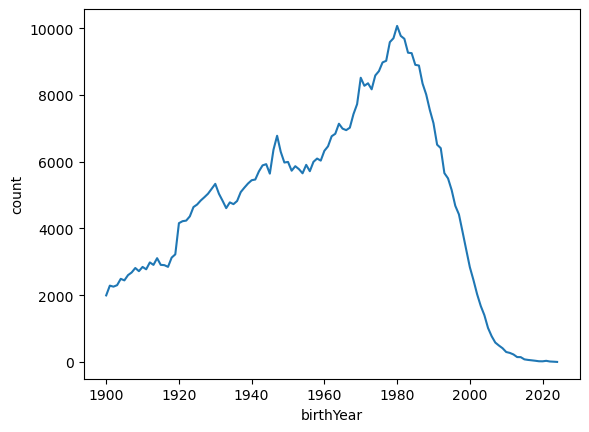

In [10]:
# groupby birth year and count
import matplotlib.pyplot as plt
import seaborn as sns
birth_yr_cnt = names.group_by('birthYear').agg(pl.count('birthYear').alias(
    'count')).sort('birthYear')


sns.lineplot(data=birth_yr_cnt.to_pandas(), x='birthYear', y='count')

In [8]:
names = names.filter(pl.col("primaryName").str.contains("Brad"))
names

nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,__index_level_0__
str,str,i64,i64,str,str,i64
"""nm0000093""","""Brad Pitt""",1963,0,"""producer,actor,executive""","""tt0137523,tt0356910,tt0114746,…",92


## Ratings Analysis

In [5]:
ratings_raw_path = "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/raw/title.ratings.tsv.gz"
with gzip.open(ratings_raw_path, 'rt', encoding='utf-8') as gz_file:
    ratings = pl.read_csv(gz_file, separator="\t")

In [10]:
ratings.describe()

statistic,tconst,averageRating,numVotes
str,str,f64,f64
"""count""","""1476218""",1.476218e6,1.476218e6
"""null_count""","""0""",0.0,0.0
"""mean""",null,6.961667,1031.263322
"""std""",null,1.378719,17751.222088
"""min""","""tt0000001""",1.0,5.0
"""25%""",null,6.2,11.0
"""50%""",null,7.2,26.0
"""75%""",null,7.9,101.0
"""max""","""tt9916880""",10.0,2.939682e6


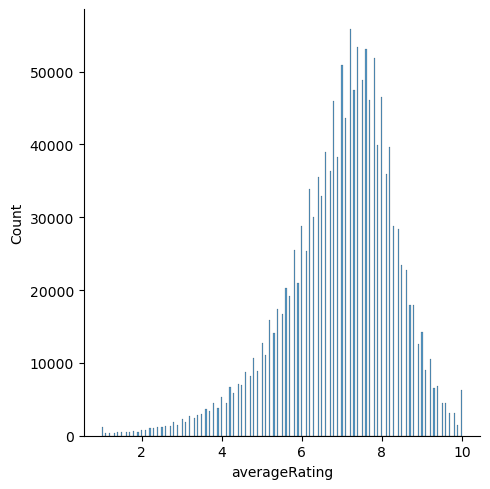

In [ ]:
from statistics import kde


sns.displot(data=ratings, x='averageRating',)

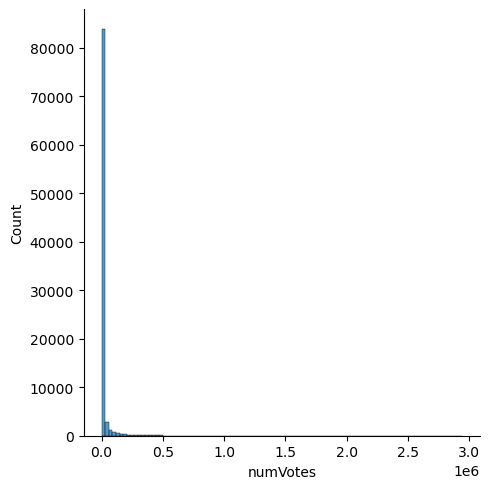

In [22]:
sns.displot(data=ratings.filter(
    pl.col('numVotes') > 1000), x='numVotes', bins=100)

In [31]:
# relationship between num votes and rating?

ratings.write_parquet(
    "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/title_ratings.parquet")

In [66]:
with open(title_basics_processed_path, 'r') as file:
    for line_num, line in enumerate(file):
        if '"' in line and line.count('"') % 2 != 0:
            print(f"Problem in line {line_num + 1}: {line}")

# with open(title_basics_processed_path, 'r') as file:
#     for line_num, line in enumerate(file):
#         if '"Rome brûle"' in line:
#             print(f"Problem in line {line_num + 1}: {line}")


# Open the input file for reading and the output file for writing
with open(title_basics_raw_path, 'r') as infile, open(title_basics_processed_path, 'w') as outfile:
    for line in infile:
        # Skip lines with mismatched quotes
        if '"' in line and line.count('"') % 2 != 0:
            continue  # Do not write this line to the output file

        # Skip lines containing the specific phrase
        if '"Rome brûle" (Portrait de Shirley Clarke)' in line:
            continue  # Do not write this line to the output file
        if 'The New Mrs Saunders' in line:
            continue
        if 'Gates Ajar' in line:
            continue
        # Write all other lines to the output file
        outfile.write(line)

In [59]:


def clean_bad_tsv(path: str, output_dir):
    """_summary_

    Args:
        path (str): _description_
    """

    with open(path, 'r') as infile, open(output_dir, 'w') as outfile:
        for line in infile:
            # Fix mismatched quotes
            if '"' in line and line.count('"') % 2 != 0:
                # Or implement a better custom fix
                line = line.replace('"', '')
            outfile.write(line)

    return


title_basics_processed_path = "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/title.basics.tsv"
clean_bad_tsv(title_basics_raw_path, output_dir=title_basics_processed_path)

In [97]:
title_basics_processed_path = "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/title_basics_movies.parquet"

title_basics = pl.read_parquet(title_basics_processed_path,
                               )

In [99]:
title_basics.describe()

statistic,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,__index_level_0__
str,str,str,str,str,f64,f64,f64,f64,str,f64
"""count""","""518825""","""518825""","""518823""","""518823""",518825.0,518825.0,518825.0,518825.0,"""518825""",518825.0
"""null_count""","""0""","""0""","""2""","""2""",0.0,0.0,0.0,0.0,"""0""",0.0
"""mean""",null,null,null,null,0.017584,2001.710004,0.0,68.480403,null,4.2714e6
"""std""",null,null,null,null,0.131434,19.892149,0.0,142.539455,null,3.6399e6
"""min""","""tt0011801""","""movie""","""!Women Art Revolution""","""#""",0.0,1951.0,0.0,0.0,"""Action""",11632.0
"""25%""",null,null,null,null,0.0,1988.0,0.0,45.0,null,338863.0
"""50%""",null,null,null,null,0.0,2009.0,0.0,81.0,null,3.917664e6
"""75%""",null,null,null,null,0.0,2017.0,0.0,96.0,null,7.660926e6
"""max""","""tt9916754""","""movie""","""Пожиратель""","""împetu""",1.0,2031.0,0.0,59460.0,"""\N""",1.1076541e7


In [74]:
title_basics['endYear'] = title_basics['endYear'].replace(r'\\N', '0', regex=True).astype(
    int)

title_basics['startYear'] = title_basics['startYear'].replace(r'\\N', '0', regex=True).astype(
    int)

title_basics.describe()

,startYear,endYear
count,1.107659e+07,1.107659e+07
mean,1.749636e+03,2.347635e+01
std,6.698880e+02,2.158049e+02
min,0.000000e+00,0.000000e+00
25%,1.987000e+03,0.000000e+00
50%,2.011000e+03,0.000000e+00
75%,2.018000e+03,0.000000e+00
max,2.031000e+03,2.030000e+03


In [95]:
# drop anything before 1950
print(f"length overall {title_basics.shape[0]}")

print(
    f"length after 1950: {title_basics[title_basics['startYear']>1950].shape[0]}")

title_basics_cleaned = title_basics[(title_basics['startYear'] > 1950) & (
    title_basics['titleType'] == 'movie')]

title_basics_cleaned['isAdult'] = title_basics_cleaned['isAdult'].astype(int)
title_basics_cleaned['startYear'] = title_basics_cleaned['startYear'].astype(
    int)
title_basics_cleaned['endYear'] = title_basics_cleaned['endYear'].astype(int)
title_basics_cleaned['runtimeMinutes'] = title_basics_cleaned['runtimeMinutes'].replace(r'\\N', '0', regex=True).astype(
    int)


title_basics_cleaned.to_parquet(
    "/Users/bradkittrell/Projects/imdb/IMDB_Fun/Data/processed/title_basics_movies.parquet")

# title_basics_cleaned.isAdult.value_counts()

length overall 11076591
length after 1950: 9450442


/var/folders/2y/ff9nvh415f39qp7gpf59jk440000gn/T/ipykernel_1862/1674133035.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_basics_cleaned['isAdult'] = title_basics_cleaned['isAdult'].astype(int)
/var/folders/2y/ff9nvh415f39qp7gpf59jk440000gn/T/ipykernel_1862/1674133035.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_basics_cleaned['startYear'] = title_basics_cleaned['startYear'].astype(
/var/folders/2y/ff9nvh415f39qp7gpf59jk440000gn/T/ipykernel_1862/1674133035.py:13: SettingWithCopyWar